<a href="https://colab.research.google.com/github/raphaelayerteyfloku1-bot/retail-sales-data-analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sales Performance and Profitability Analysis for a Retail Business**

**PROBLEM STATEMENT**

The retail business has collected large volumes of transaction data but struggles to extract actionable insights from it. Key business questions such as Which customers contribute the most to sales?, Which payment methods are preferred?, and What purchasing patterns exist across different times of the year? remain unanswered. This lack of visibility limits the company’s ability to segment customers, forecast demand, and tailor its sales strategies resulting in missed revenue opportunities and suboptimal customer satisfaction.


**OBJECTIVES**

The main objective of this Capstone project is to analyse sales performance and profitability patterns within the retail business to support data-driven decision-making. Specific objectives include:


*   To analyse sales trends across different years, months, and time periods.
*  	To evaluate product category and brand performance in terms of sales volume and profit contribution.
*  	To measure the effect of discounting on profitability and identify optimal pricing strategies.
*   To assess regional and city-level performance





**Introduction to the Dataset**

The dataset used for this analysis contains detailed retail transaction records capturing customer purchases across different regions and cities. Each row represents a unique order, identified by an Order ID, along with the Order Date and the Customer Name. The dataset includes information on the Region and City, enabling geographic performance analysis.
Product information is categorized into Category, Sub-Category, and Product Name, allowing detailed evaluation of product level sales behaviour. Transaction metrics such as Quantity, Unit Price, Discount, Sales, and Profit provide insights into revenue generation, pricing strategies, and profitability.
Additionally, the dataset records the Payment Mode used by customers, supporting analysis of customer payment preferences. Overall, the dataset offers a comprehensive view of sales performance, customer behaviour, product profitability, and regional trends within the retail business.


In [163]:
#Loading Toolkits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [164]:
#loading dataset
df = pd.read_csv("data.csv")

In [165]:
df

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,10/19/2024,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,"68,959","10,525",Debit Card
1,10002,8/30/2025,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,"33,732","6,300",Debit Card
2,10003,11/4/2023,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,"207,603","19,850",Credit Card
3,10004,5/23/2025,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,"158,610","36,311",UPI
4,10005,1/19/2025,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,"45,033","9,050",Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14996,6/25/2024,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,"182,013","11,853",Debit Card
4996,14997,12/22/2024,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,"350,240","31,237",Credit Card
4997,14998,4/15/2025,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,"35,838","7,828",Debit Card
4998,14999,7/8/2024,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,"48,845","6,604",Credit Card


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [167]:
#Checking missing values
df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer Name,0
Region,0
City,0
Category,0
Sub-Category,0
Product Name,0
Quantity,0
Unit Price,0


In [168]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

In [169]:
#defining date and time
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [170]:
#Sales per category
df.groupby('Category')['Sales'].sum()

,Sales
Category,
Beauty,"50,803,410"
Books,"54,932,643"
Clothing,"55,053,908"
Electronics,"52,587,884"
Furniture,"56,647,188"
Groceries,"47,883,103"
Home Decor,"57,233,222"
Kitchen,"54,227,902"
Sports,"52,069,397"


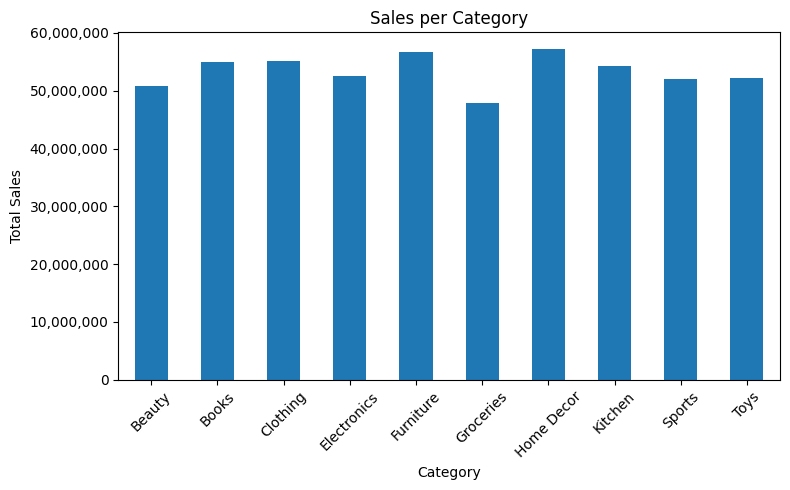

In [171]:
#Visualization of category sales
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title('Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()




  Home decor category recoreded highest sales while groceries recorded low sales.
  



In [172]:
#Profit by category
df.groupby('Category')['Profit'].sum()

,Profit
Category,
Beauty,"7,213,436"
Books,"8,076,273"
Clothing,"8,445,750"
Electronics,"8,042,134"
Furniture,"8,693,087"
Groceries,"7,075,333"
Home Decor,"8,556,847"
Kitchen,"7,879,573"
Sports,"7,739,430"


In [173]:
from pandas.core.indexes import category
category_profit = df.groupby('Category')['Profit'].sum()

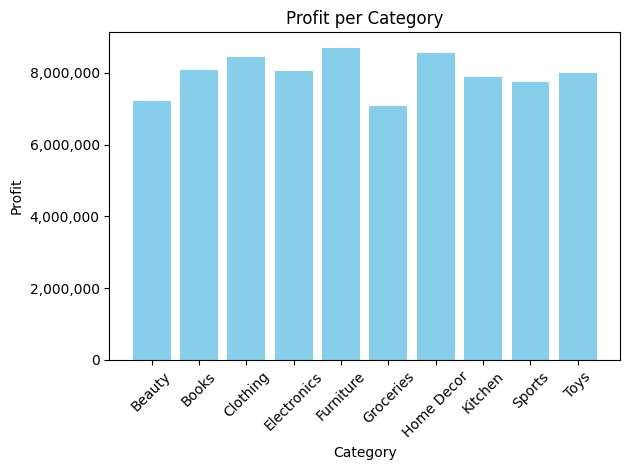

In [174]:
#Visualizing profit per Category
from matplotlib.ticker import FuncFormatter

plt.bar(category_profit.index,
        category_profit.values,
        color='skyblue')
plt.title("Profit per Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

Furniture recorded total profit per category while groceries recoreded the lowest profit.

In [175]:
#Discount by Region
df.groupby('Region')['Discount'].sum()

,Discount
Region,
East,12665
North,13330
South,11975
West,12285


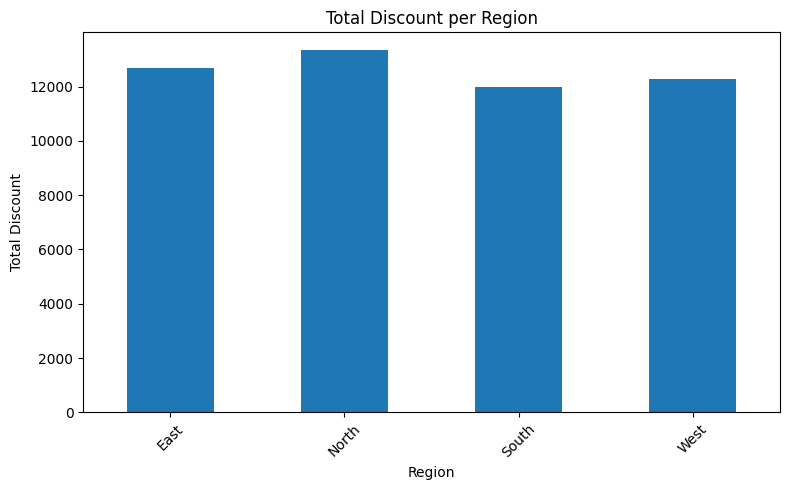

In [176]:
#Visualize discount by region
region_discount = df.groupby('Region')['Discount'].sum()
plt.figure(figsize=(8,5))
region_discount.plot(kind='bar')
plt.title('Total Discount per Region')
plt.xlabel('Region')
plt.ylabel('Total Discount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum()

In [178]:
categories = category_summary.index
sales = category_summary['Sales']
profit = category_summary['Profit']

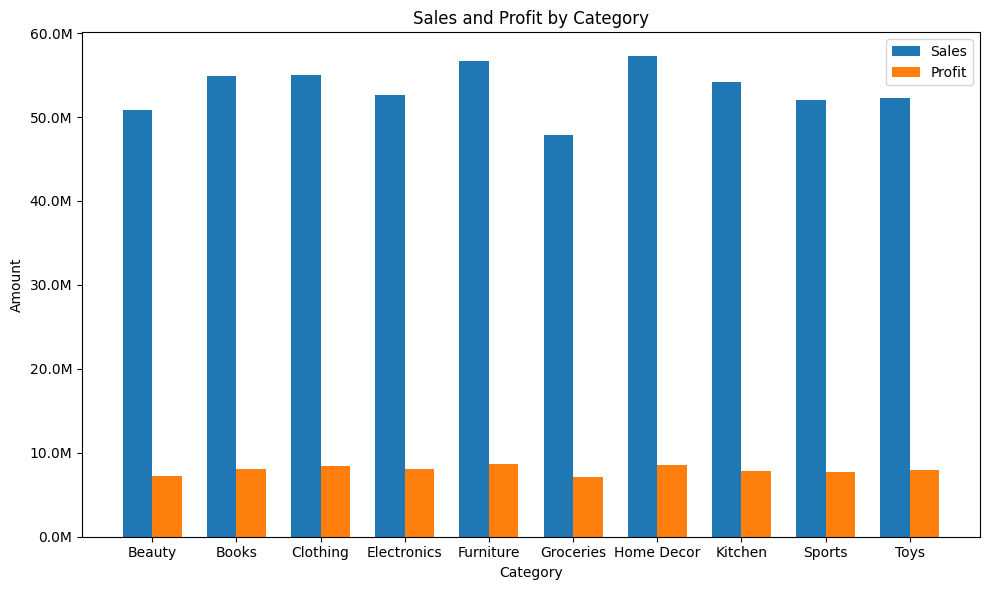

In [179]:
#Sales and Profit per Category
x = np.arange(len(category_summary))  # label locations
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, sales, width, label='Sales')
plt.bar(x + width/2, profit, width, label='Profit')
plt.title('Sales and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(x, category_summary.index)
plt.legend()
plt.ylim(bottom=0)

# Remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Format numbers in millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, pos: f'{y/1_000_000:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [180]:
#Discount per category
total_discount_category = df.groupby("Category")["Discount"].sum()
print(total_discount_category)

Category
Beauty         4470
Books          5210
Clothing       5090
Electronics    4500
Furniture      5340
Groceries      4705
Home Decor     5280
Kitchen        5505
Sports         5070
Toys           5085
Name: Discount, dtype: int64


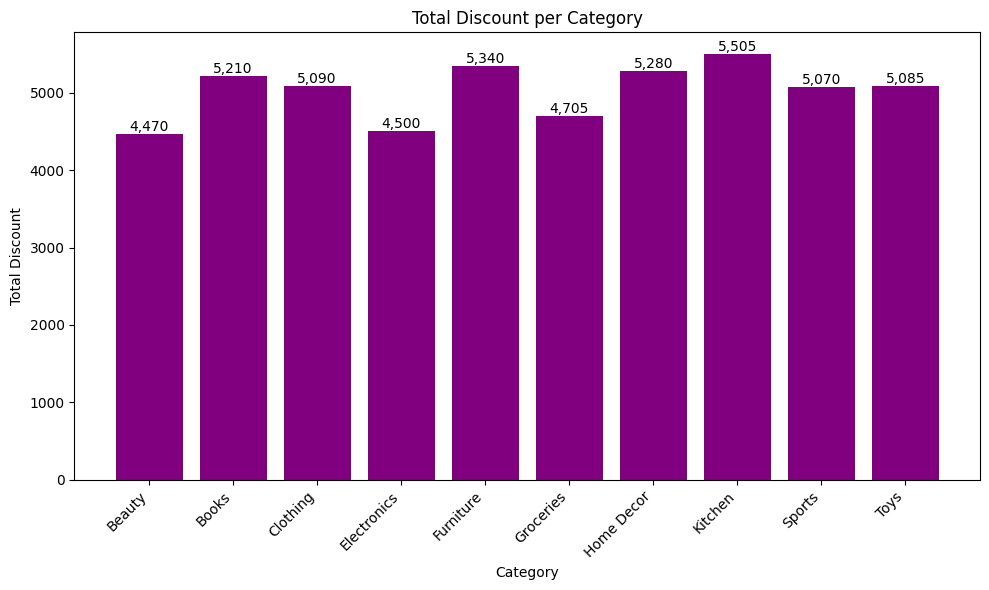

In [181]:
#Visualize discount on profit
plt.figure(figsize=(10, 6))
bars = plt.bar(total_discount_category.index, total_discount_category
        .values, color="purple")
plt.title("Total Discount per Category")
plt.xlabel("Category")
plt.ylabel("Total Discount") # Added y-axis label
plt.bar_label(bars, fmt='{:,.0f}') # Format to 0 decimal places and apply to 'bars'
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Kitchen recieved the highest discounts.

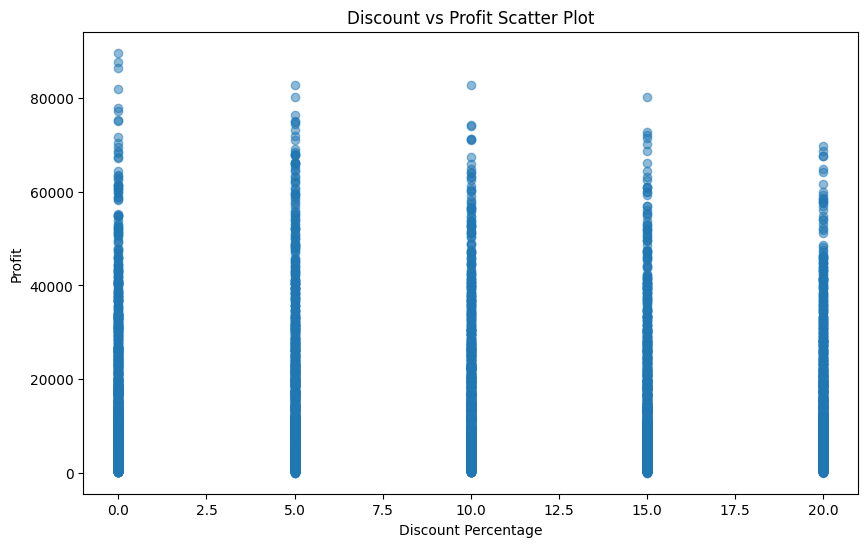

In [182]:
#scatter plot for discount and profit per category
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5) # alpha controls point transparency

# Add titles and labels
plt.title('Discount vs Profit Scatter Plot')
plt.xlabel('Discount Percentage')
plt.ylabel('Profit')

# Display the plot
plt.show()

In [183]:
#Sales by sub category
df.groupby('Sub-Category')['Sales'].sum()

,Sales
Sub-Category,
Accessories,"11,719,872"
Action Figure,"9,922,271"
Bed,"12,211,589"
Biography,"9,990,434"
Board Game,"10,615,672"
Cabinet,"10,367,085"
Camera,"10,547,720"
Chair,"10,272,174"
Clock,"9,993,236"


In [184]:
#defininG sales per sub-category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum()

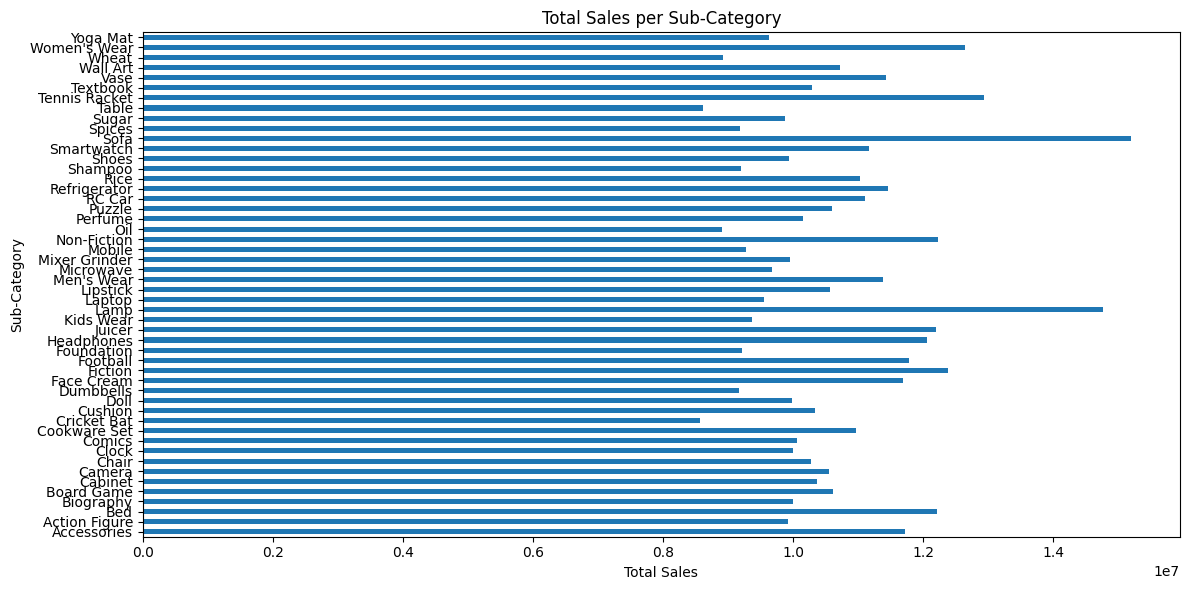

In [185]:
#Visualizing Total Sales per Sub Category
plt.figure(figsize=(12,6))
subcat_sales.plot(kind='barh')
plt.title('Total Sales per Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


In [186]:
#Top 15 sales from sub-category
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(15)

,Sales
Sub-Category,
Sofa,"15,185,544"
Lamp,"14,767,580"
Tennis Racket,"12,934,015"
Women's Wear,"12,646,603"
Fiction,"12,376,113"
Non-Fiction,"12,219,034"
Bed,"12,211,589"
Juicer,"12,194,034"
Headphones,"12,058,509"


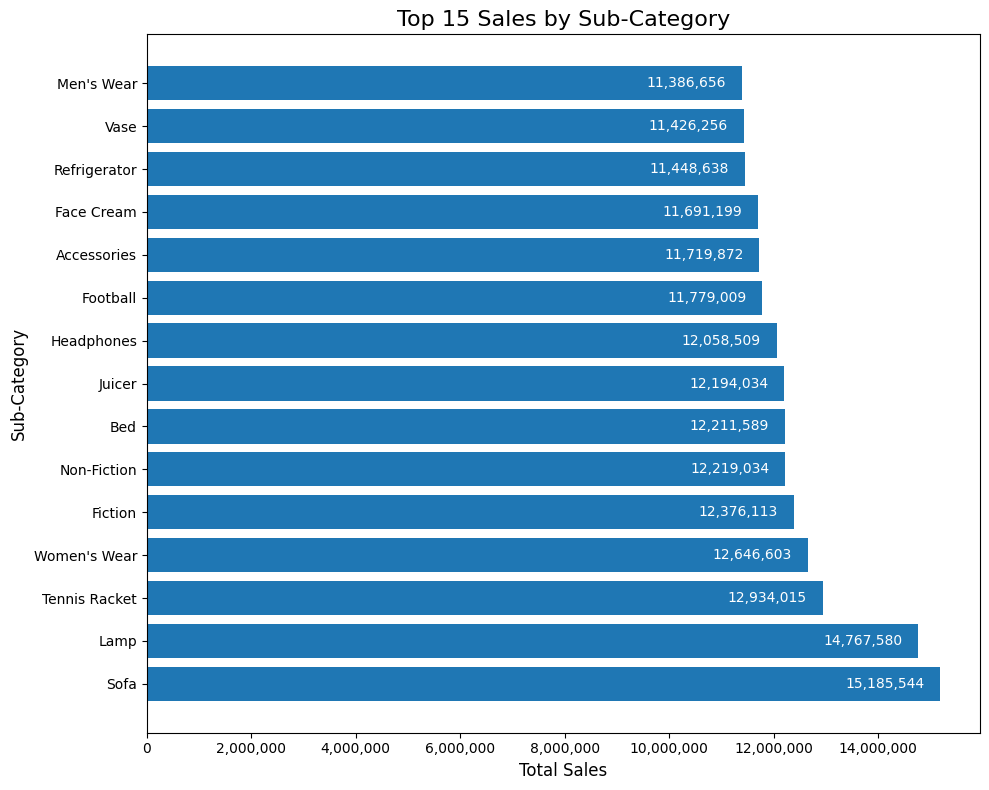

In [187]:
#Viaulizing top 15 sales per sub-category
top15 = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 8))
plt.barh(top15.index, top15.values)
plt.title('Top 15 Sales by Sub-Category', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{x:,.0f}')
)
max_value = max(top15.values)
for index, value in enumerate(top15.values):
    plt.text(
        value - (max_value * 0.02),
        index,
        f'{value:,.0f}',
        va='center',
        ha='right',
        fontsize=10,
        color='white'
    )

plt.tight_layout()
plt.show()


Sofa recoreded the highest sales in the sub-category.

In [188]:
#Profit per sub-category
df.groupby('Sub-Category')['Profit'].sum()

,Profit
Sub-Category,
Accessories,"1,702,232"
Action Figure,"1,633,699"
Bed,"1,852,587"
Biography,"1,493,262"
Board Game,"1,516,854"
Cabinet,"1,605,678"
Camera,"1,641,873"
Chair,"1,548,661"
Clock,"1,571,873"


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

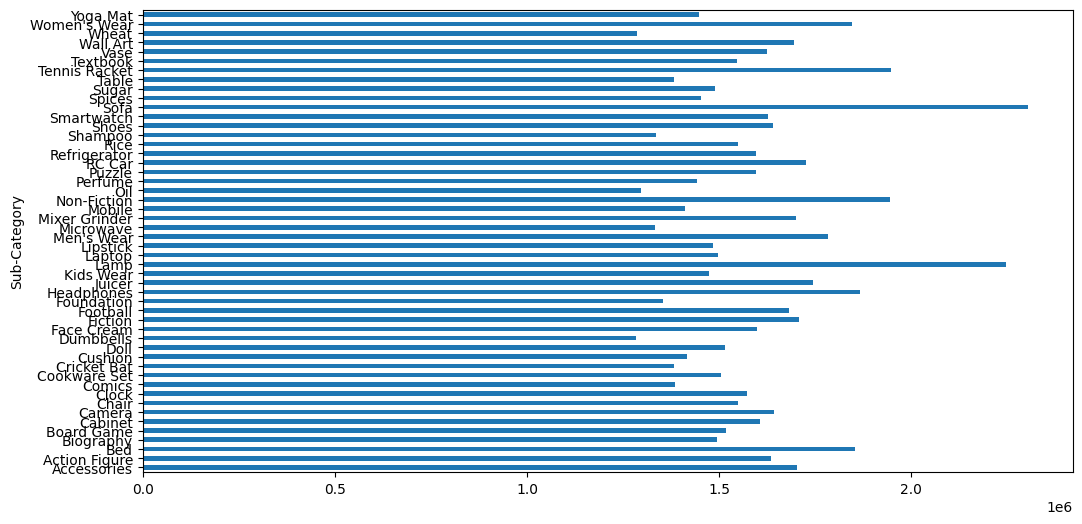

In [189]:
#Visualize profits per sub-category
plt.figure(figsize=(12,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum()
subcat_profit.plot(kind='barh')
plt

In [190]:
#top 15 sub-category per profit
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(15)

,Profit
Sub-Category,
Sofa,"2,304,899"
Lamp,"2,247,216"
Tennis Racket,"1,946,588"
Non-Fiction,"1,945,175"
Headphones,"1,867,458"
Bed,"1,852,587"
Women's Wear,"1,846,404"
Men's Wear,"1,784,307"
Juicer,"1,743,368"


In [191]:
#visualize top 15 profit per sub-category
top15_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(15)


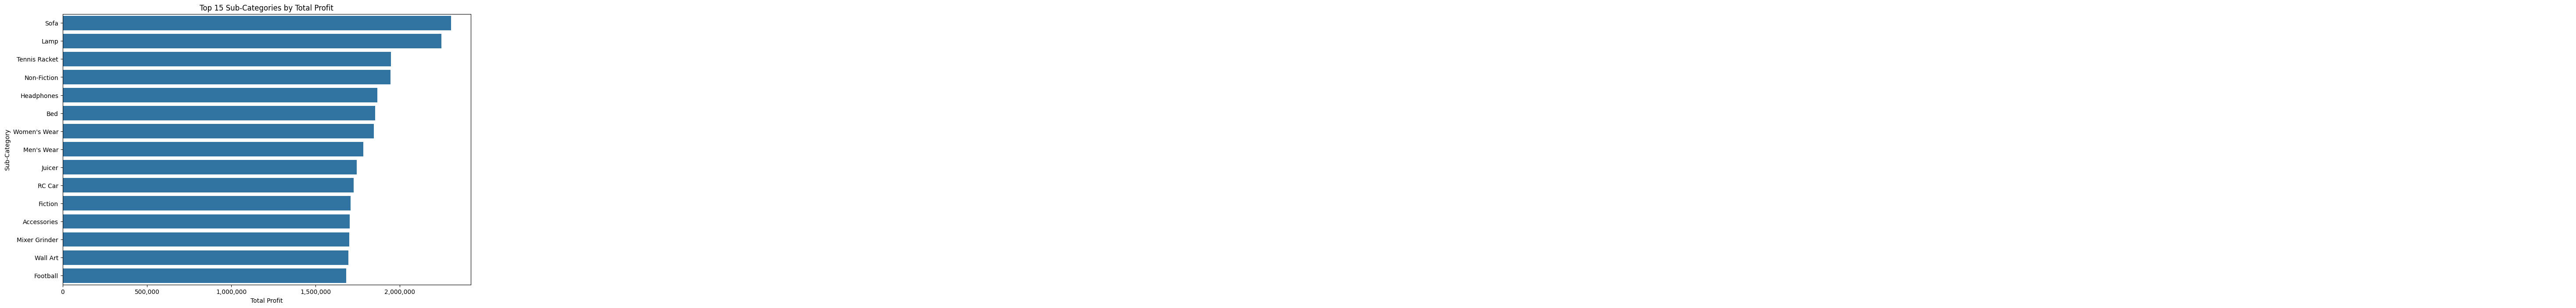

In [192]:
top15_profit = subcat_profit.sort_values(ascending=False).head(15)

# 4. Visualize the top 15 using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top15_profit.values, y=top15_profit.index,)

# Add labels and title
plt.title('Top 15 Sub-Categories by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.gca().get_xaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{x:,.0f}')
)
max_value = max(top15.values)
for index, value in enumerate(top15.values):
    plt.text(
        value - (max_value * 0.02),
        index,
        f'{value:,.0f}',
        va='center',
        ha='right',
        fontsize=10,
        color='white'
    )

# Display the plot
plt.show()

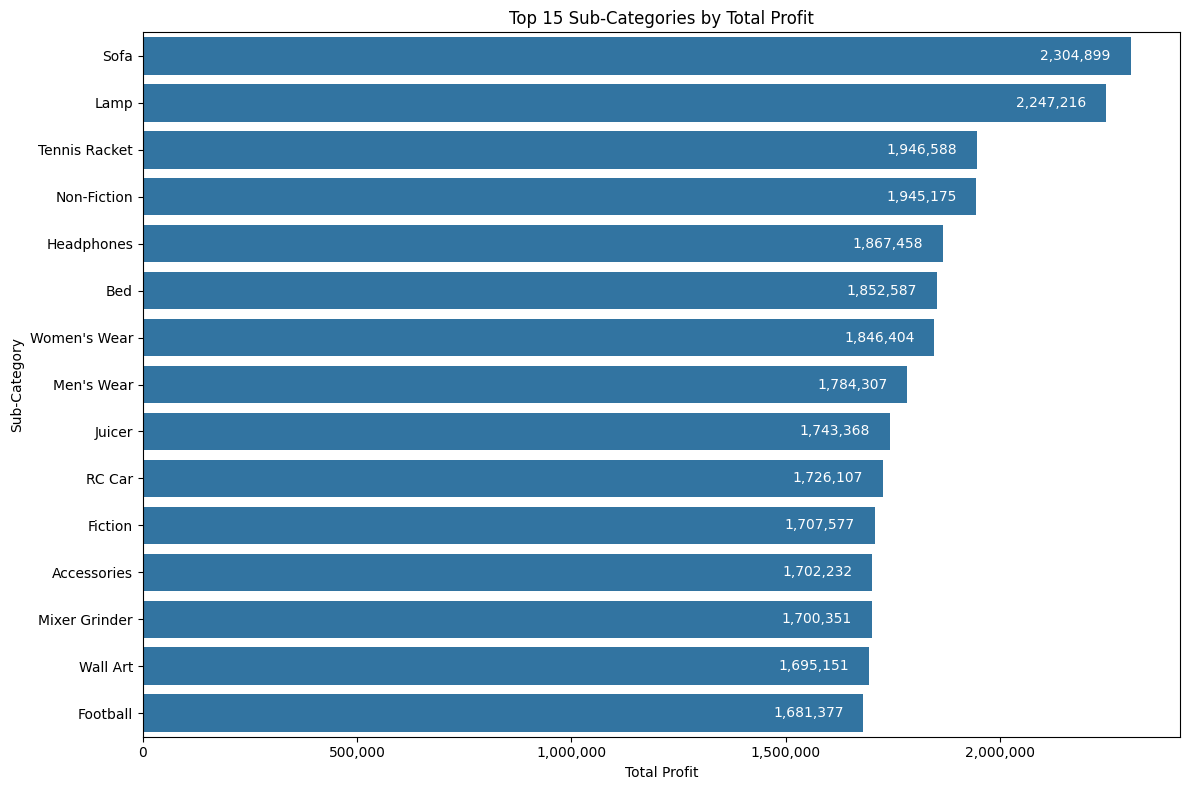

In [193]:
#Visualize top 15 profit by sub-category
top15_profit = subcat_profit.sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    x=top15_profit.values,
    y=top15_profit.index,
    ax=ax
)
ax.set_title('Top 15 Sub-Categories by Total Profit')
ax.set_xlabel('Total Profit')
ax.set_ylabel('Sub-Category')
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, p: f'{x:,.0f}')
)
max_value = max(top15_profit.values)

for index, value in enumerate(top15_profit.values):
    ax.text(
        value - (max_value * 0.02),
        index,
        f'{value:,.0f}',
        va='center',
        ha='right',
        fontsize=10,
        color='white'
    )

plt.tight_layout()
plt.show()


Sofa once again recorded highest profit in producat sub-category.

In [194]:
#Discounts per sub-category
top15_discount_subcat = df.groupby("Sub-Category")["Discount"].sum().sort_values(ascending=False).head(15)
print(top15_discount_subcat)

Sub-Category
Lamp             1230
Sofa             1225
Cookware Set     1200
Juicer           1185
Non-Fiction      1155
Bed              1155
Football         1150
Biography        1150
Refrigerator     1130
Women's Wear     1115
Action Figure    1095
Vase             1095
RC Car           1085
Men's Wear       1070
Puzzle           1065
Name: Discount, dtype: int64


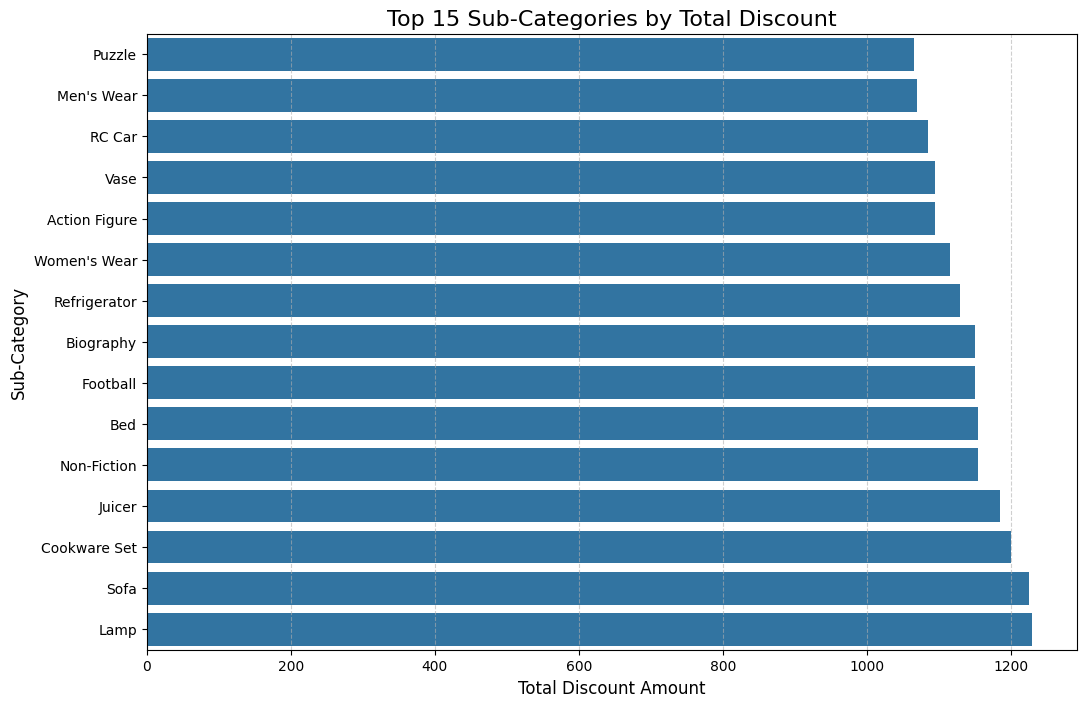

In [195]:
#Visualize top 15 discount per sub-category
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
sns.barplot(x='Discount', y='Sub-Category', data=top15_discount_subcat.reset_index())

# Add plot customizations
plt.title('Top 15 Sub-Categories by Total Discount', fontsize=16)
plt.xlabel('Total Discount Amount', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.gca().invert_yaxis() # Invert the Y-axis to have the highest discount at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Display the plot
plt.show()

Lamp received highest discount followed by sofa. It can be contested that, Sofa's high sales and profits were driven by high discounts.

In [196]:
#defining sales per region
region_sales = df.groupby('Region')['Sales'].sum()


In [197]:
#Sales by Region
df.groupby('Region')['Sales'].sum()
pd.options.display.float_format = '{:,.0f}'.format
print(region_sales)

Region
East    135,811,638
North   143,578,246
South   123,230,167
West    131,045,973
Name: Sales, dtype: float64


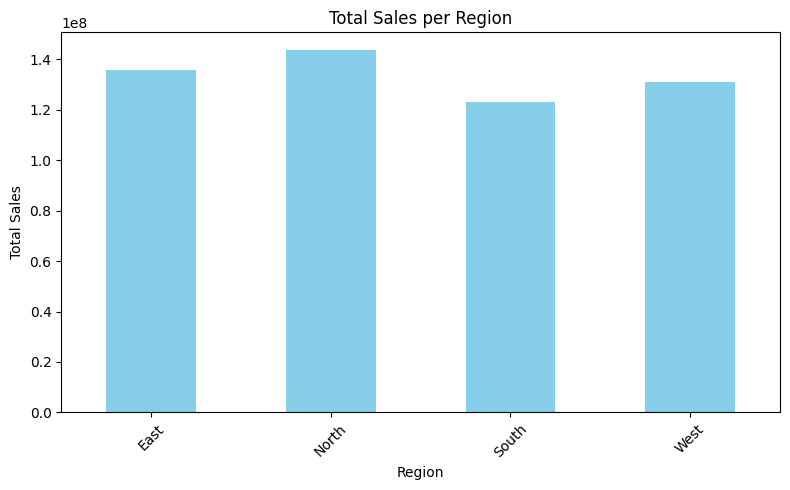

In [198]:
#Visualizing Sales by Region
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It is shown from the bar chart above that the North recorded highest sales per region while the South recorded lowest sales per region.

In [199]:
#Profit by Region
df.groupby('Region')['Profit'].sum()

,Profit
Region,
East,"20,532,558"
North,"21,343,004"
South,"18,253,049"
West,"19,580,123"


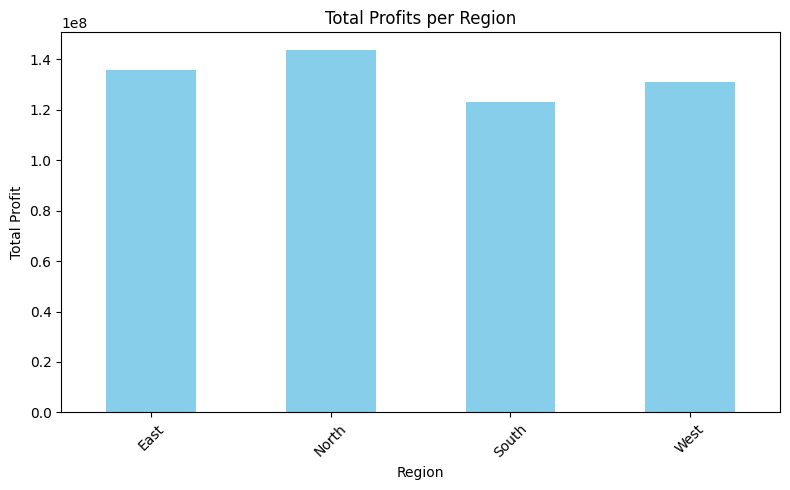

In [200]:
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Profits per Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The North recoreded highest profit and the South recorded low.

In [201]:
#Sales and profit per region
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum()
print(region_summary)

             Sales     Profit
Region                       
East   135,811,638 20,532,558
North  143,578,246 21,343,004
South  123,230,167 18,253,049
West   131,045,973 19,580,123


In [202]:
df_melted = df.melt(id_vars='Region', var_name='Metric', value_name='Amount')

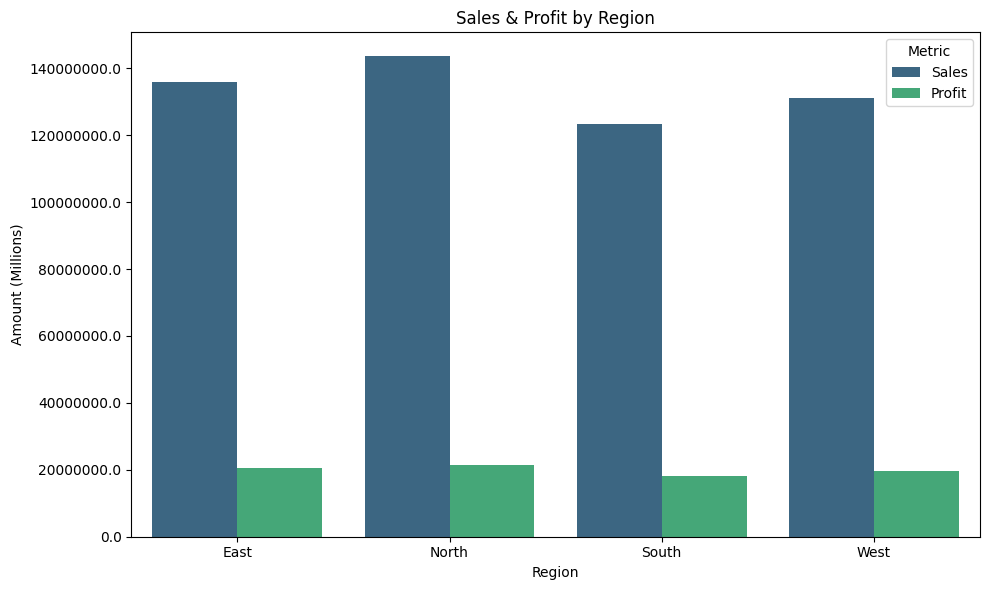

In [203]:
#Visualize sales and profit per region
df_melted = region_summary.reset_index().melt(
    id_vars='Region',
    value_vars=['Sales', 'Profit'],
    var_name='Metric',
    value_name='Amount'
)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Region',
    y='Amount',
    hue='Metric',
    data=df_melted,
    palette="viridis"
)
plt.title('Sales & Profit by Region')
plt.xlabel('Region')
plt.ylabel('Amount (Millions)')
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda x, p: f'{x:.1f}')
)
plt.tight_layout()
plt.show()


In [204]:
#Sales by City
df.groupby('City')['Sales'].sum()

,Sales
City,
Ahmedabad,"25,003,500"
Amritsar,"28,746,184"
Bangalore,"29,989,841"
Bhubaneswar,"27,088,786"
Chandigarh,"29,331,057"
Chennai,"24,884,810"
Coimbatore,"23,652,549"
Delhi,"26,280,118"
Goa,"26,927,480"


In [205]:
#Defining Sales per City
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

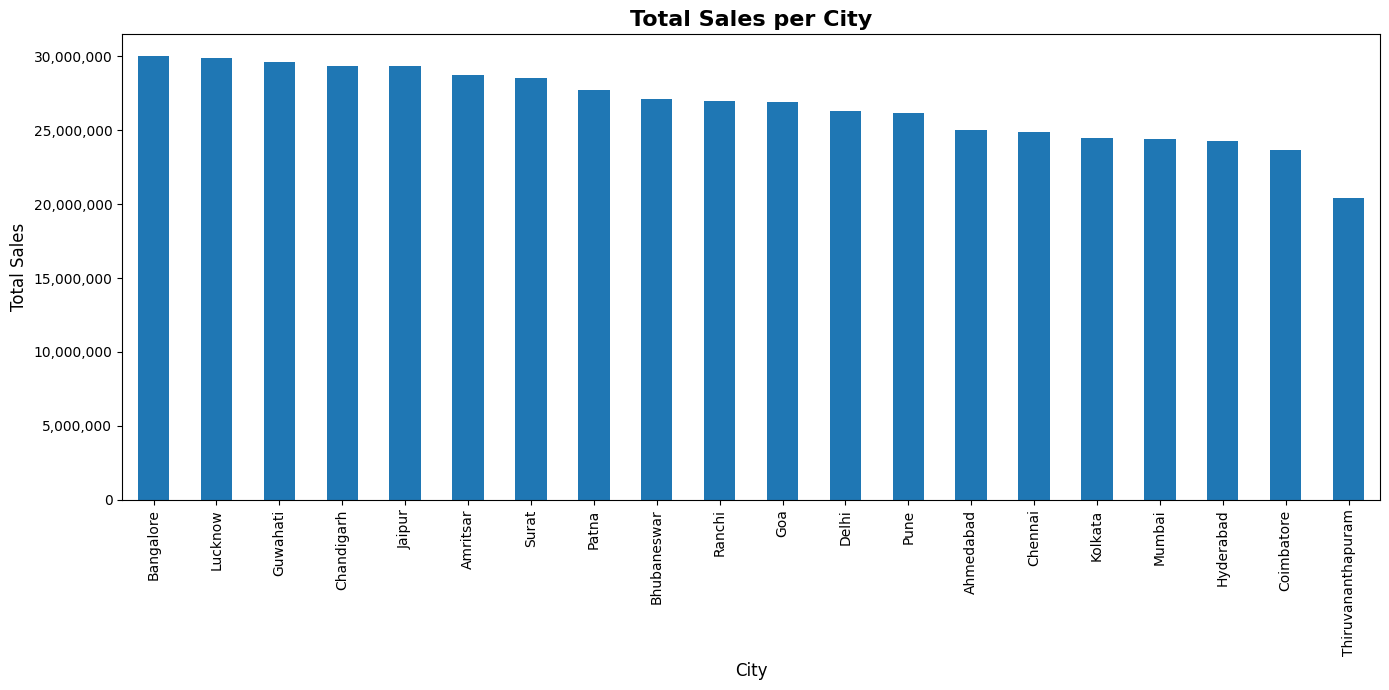

In [206]:
#Visualizing Sales per city
plt.figure(figsize=(14, 7))
ax = city_sales.plot(kind='bar')
plt.title('Total Sales per City', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

Bangalore recored the highest sales among all cities.


In [207]:
#profit per city
df.groupby('City')['Profit'].sum().sort_values(ascending=False)

,Profit
City,
Lucknow,"4,523,681"
Guwahati,"4,487,271"
Bangalore,"4,416,915"
Chandigarh,"4,375,380"
Jaipur,"4,353,578"
Surat,"4,294,995"
Amritsar,"4,202,631"
Patna,"4,131,315"
Ranchi,"4,113,314"


In [208]:
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")


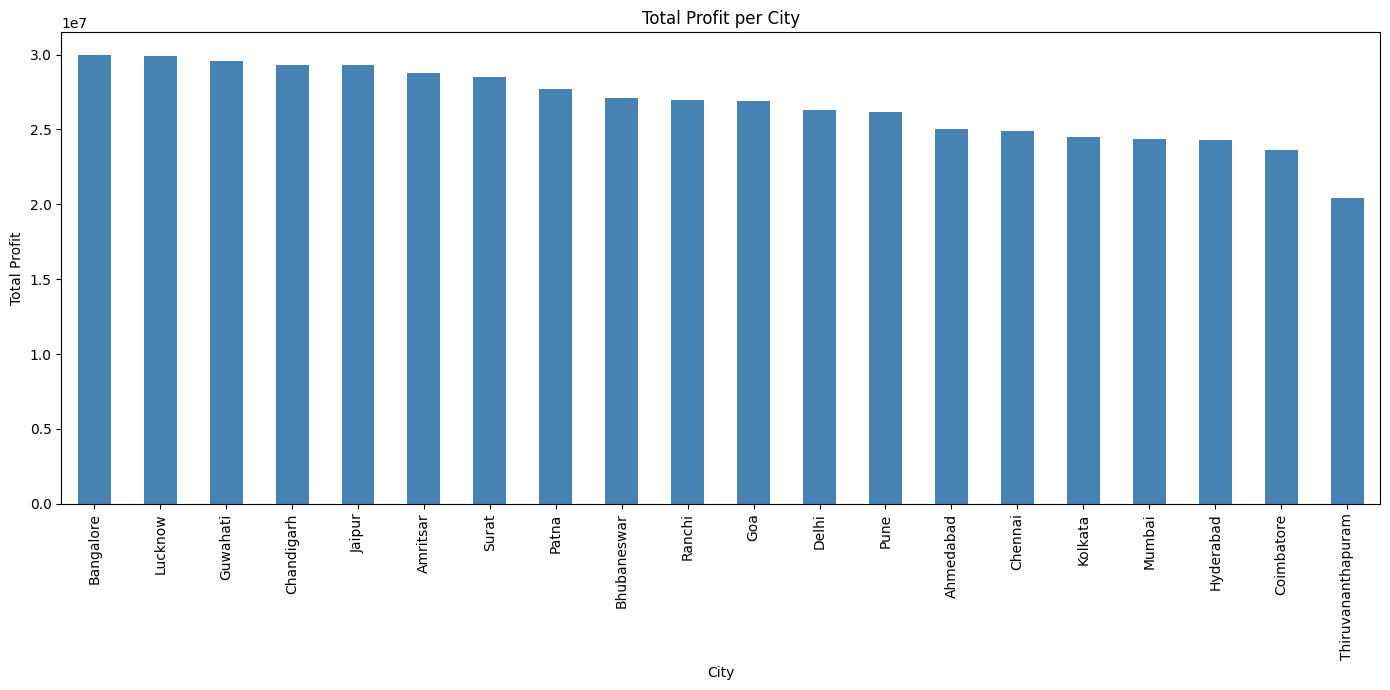

In [209]:
#Visualizing profit per city
plt.figure(figsize=(14,7))
city_sales.plot(kind='bar', color='steelblue')
plt.title('Total Profit per City')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Lucknow profit recored the highest sales among all cities.

In [210]:
#Sales and Profit per city
city_summary = df.groupby('City')[['Sales', 'Profit']].sum()
print(city_summary)

                        Sales    Profit
City                                   
Ahmedabad          25,003,500 3,676,998
Amritsar           28,746,184 4,202,631
Bangalore          29,989,841 4,416,915
Bhubaneswar        27,088,786 4,070,957
Chandigarh         29,331,057 4,375,380
Chennai            24,884,810 3,768,450
Coimbatore         23,652,549 3,537,364
Delhi              26,280,118 3,887,734
Goa                26,927,480 4,027,400
Guwahati           29,606,889 4,487,271
Hyderabad          24,301,947 3,498,597
Jaipur             29,319,403 4,353,578
Kolkata            24,464,634 3,729,701
Lucknow            29,901,483 4,523,681
Mumbai             24,391,228 3,743,420
Patna              27,702,815 4,131,315
Pune               26,190,831 3,837,310
Ranchi             26,948,513 4,113,314
Surat              28,532,935 4,294,995
Thiruvananthapuram 20,401,020 3,031,723


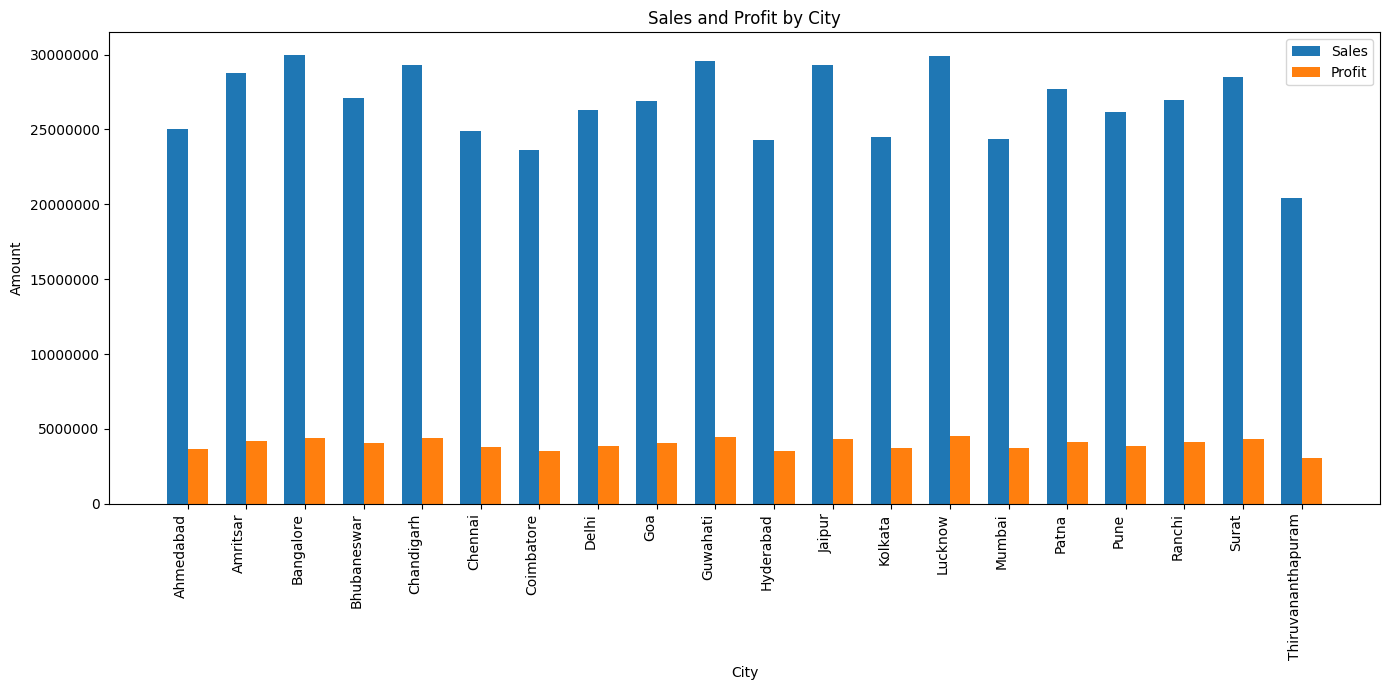

In [211]:
#visualize city summary
fig, ax = plt.subplots(figsize=(14, 7)) # Increased figure size for better readability of many cities
bar_width = 0.35

# 'City' is the index, not a column
cities = city_summary.index
sales = city_summary['Sales']
profits = city_summary['Profit']

x = np.arange(len(cities)) # The label locations

rects1 = ax.bar(x - bar_width/2, sales, bar_width, label='Sales')
rects2 = ax.bar(x + bar_width/2, profits, bar_width, label='Profit')

ax.set_xlabel('City')
ax.set_ylabel('Amount')
ax.set_title('Sales and Profit by City')
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=90, ha='right')
ax.legend()

# Remove scientific notation
ax.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

In [212]:
#Discount per city
total_discount_city = df.groupby("City")["Discount"].sum().sort_values(ascending=False)
print(total_discount_city)

City
Guwahati              3110
Chandigarh            2815
Jaipur                2670
Lucknow               2635
Delhi                 2625
Chennai               2595
Patna                 2590
Amritsar              2585
Goa                   2550
Bhubaneswar           2470
Surat                 2455
Ahmedabad             2435
Bangalore             2430
Pune                  2425
Mumbai                2420
Ranchi                2395
Coimbatore            2375
Hyderabad             2325
Thiruvananthapuram    2250
Kolkata               2100
Name: Discount, dtype: int64


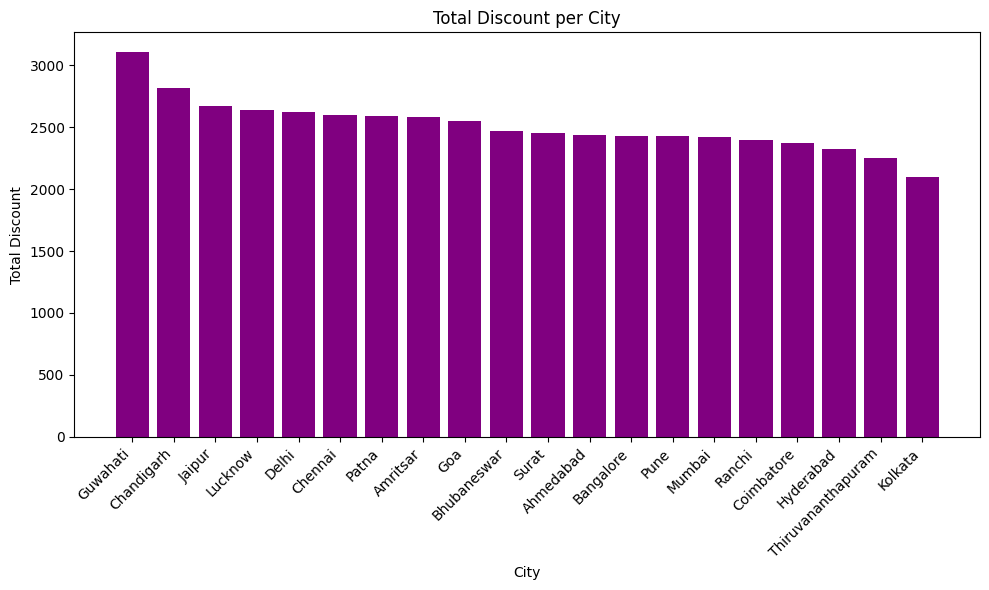

In [213]:
#visualize discount per city
plt.figure(figsize=(10, 6))
plt.bar(total_discount_city.index, total_discount_city.values, color="purple")
plt.title("Total Discount per City")
plt.xlabel("City")
plt.ylabel("Total Discount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Guwahati recorded highest discounts.

In [214]:
#Top 10 peoducts per sales
top10_sales = df.groupby("Product Name")["Sales"].sum()
print(top10_sales.sort_values(ascending=False).head(10))

Product Name
Headphones Accusantium    857,184
Spices Quibusdam          687,651
Accessories Repellendus   687,083
Bed Tenetur               670,995
Laptop Similique          666,641
Lamp Enim                 665,920
Shampoo Commodi           659,547
Lamp Veritatis            652,910
Men's Wear Voluptatibus   649,048
Textbook Omnis            633,246
Name: Sales, dtype: float64


In [215]:
#Visualize top 10 products per sales
top10 = top10_sales.sort_values(ascending=False).head(10)
plot = px.bar(
    top10,
    x=top10.index,
    y=top10.values,
    text=top10.values,
    title='Top 10 Products by Sales',
    color_discrete_sequence=['steelblue']
)
plot.show()


In [216]:
#Top 10 products per profit
top10_profit = df.groupby("Product Name")["Profit"].sum()
print(top10_profit.sort_values(ascending=False).head(10))

Product Name
Headphones Accusantium    141,874
Laptop Similique          136,752
Accessories Repellendus   131,526
Textbook Omnis            119,167
Lipstick Accusamus        119,018
Men's Wear Voluptatibus   118,301
Shampoo Commodi           111,951
Cushion Rem               111,531
Wall Art Saepe            109,549
Sugar Voluptates          108,494
Name: Profit, dtype: float64


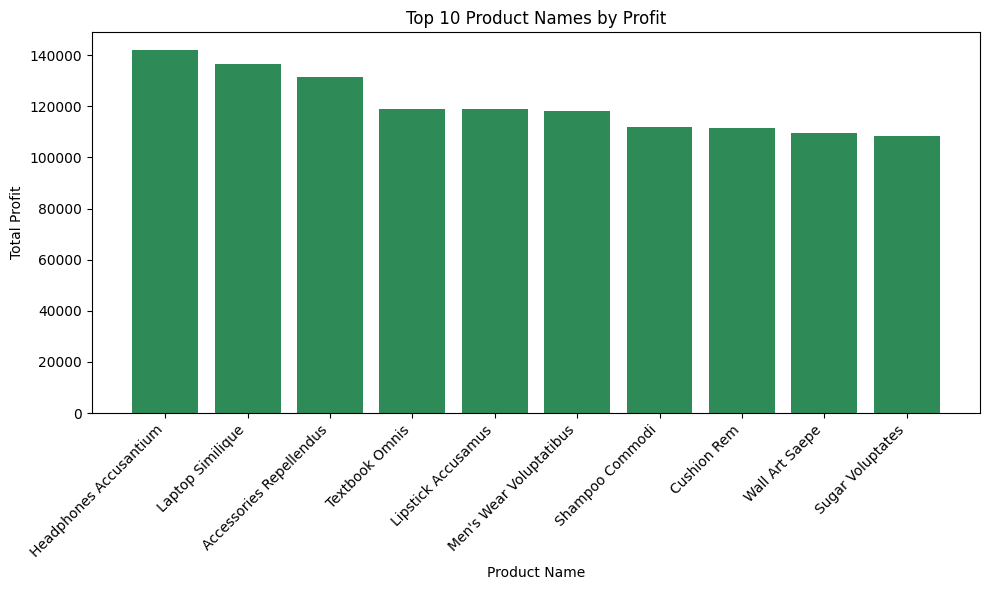

In [217]:
# Group by product name and sum total profit
top10_profit = df.groupby("Product Name")["Profit"].sum() \
                 .sort_values(ascending=False) \
                 .head(10)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(top10_profit.index, top10_profit.values, color="seagreen")
plt.title("Top 10 Product Names by Profit")
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Headphones recorded the highest profits per products.

In [218]:
#Top 10 products from Sales and Profit
top10_sales_profit = df.groupby("Product Name")[["Sales", "Profit"]].sum().sort_values(by='Sales', ascending=False).head(10)
print(top10_sales_profit)

                          Sales  Profit
Product Name                           
Headphones Accusantium  857,184 141,874
Spices Quibusdam        687,651  96,587
Accessories Repellendus 687,083 131,526
Bed Tenetur             670,995 100,234
Laptop Similique        666,641 136,752
Lamp Enim               665,920  93,639
Shampoo Commodi         659,547 111,951
Lamp Veritatis          652,910  62,923
Men's Wear Voluptatibus 649,048 118,301
Textbook Omnis          633,246 119,167


<Figure size 1200x800 with 0 Axes>

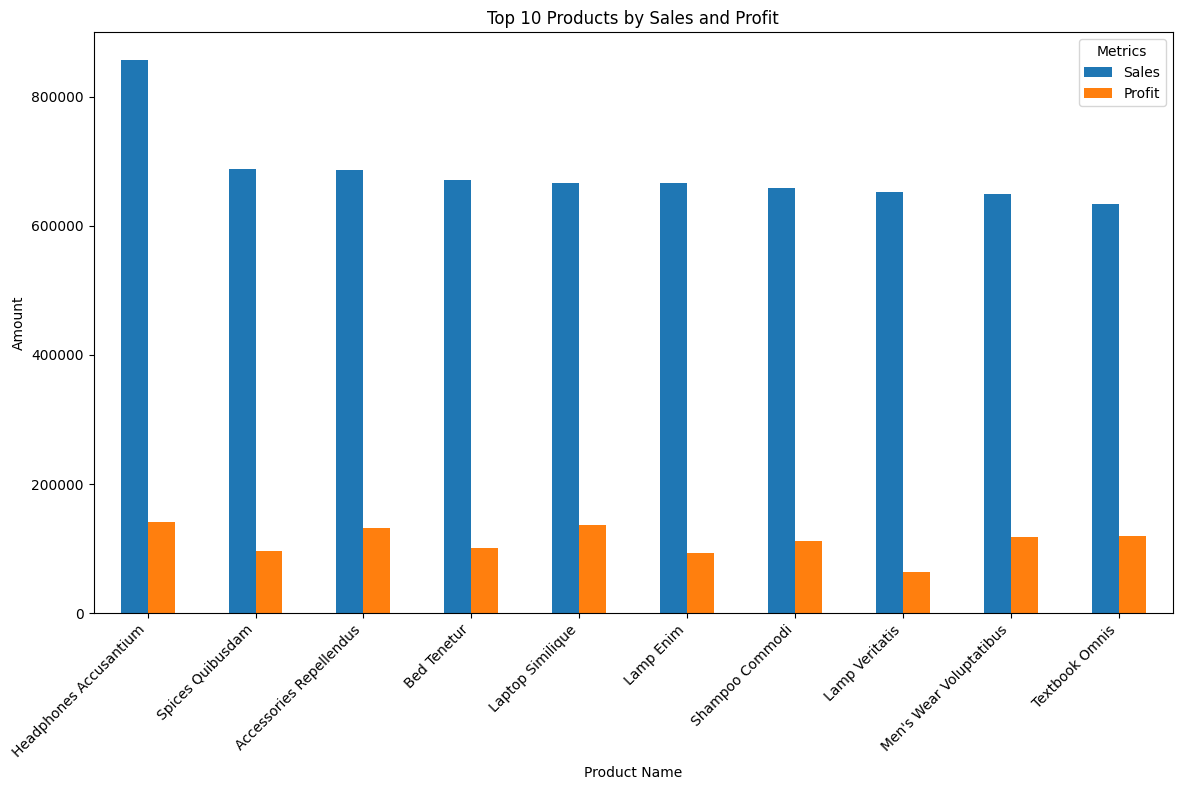

In [219]:
#Visualize top10_sales_profit products
plt.figure(figsize=(12, 8))
top10_sales_profit[['Sales', 'Profit']].plot(kind='bar', figsize=(12, 8))
plt.title('Top 10 Products by Sales and Profit')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [220]:
#top 10 products by discounts
top10_discount = df.groupby("Product Name")["Discount"].sum().sort_values(ascending=False).head(10)
print(top10_discount)

Product Name
Chair Adipisci              65
Tennis Racket Laboriosam    60
Refrigerator Aliquid        55
Biography Accusamus         55
Juicer Fugit                55
Puzzle Illo                 55
Non-Fiction Molestiae       55
Fiction Officiis            55
Vase Esse                   50
Women's Wear Corporis       50
Name: Discount, dtype: int64


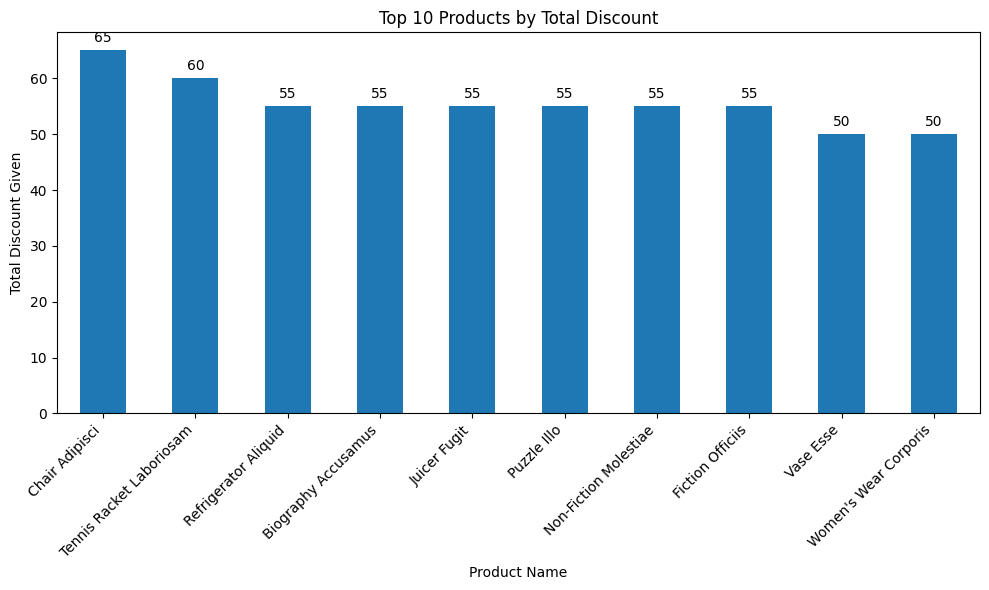

In [221]:
#Visualize top 10 products per discounts
top10_discount = (
    df.groupby("Product Name")["Discount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
bars = top10_discount.plot(kind="bar")

plt.title("Top 10 Products by Total Discount")
plt.xlabel("Product Name")
plt.ylabel("Total Discount Given")
for i, v in enumerate(top10_discount.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Chair Adipisci recieved highest discount but it is missing in top 10 products for both sales and profit.

In [222]:
#Correlatin between Discount and Profit
df[['Discount','Profit']].corr()

,Discount,Profit
Discount,1,-0
Profit,-0,1


In [223]:
corr = df[['Discount', 'Profit']].corr()

In [224]:
discount_profit = df.groupby("Discount")["Profit"].mean().reset_index()

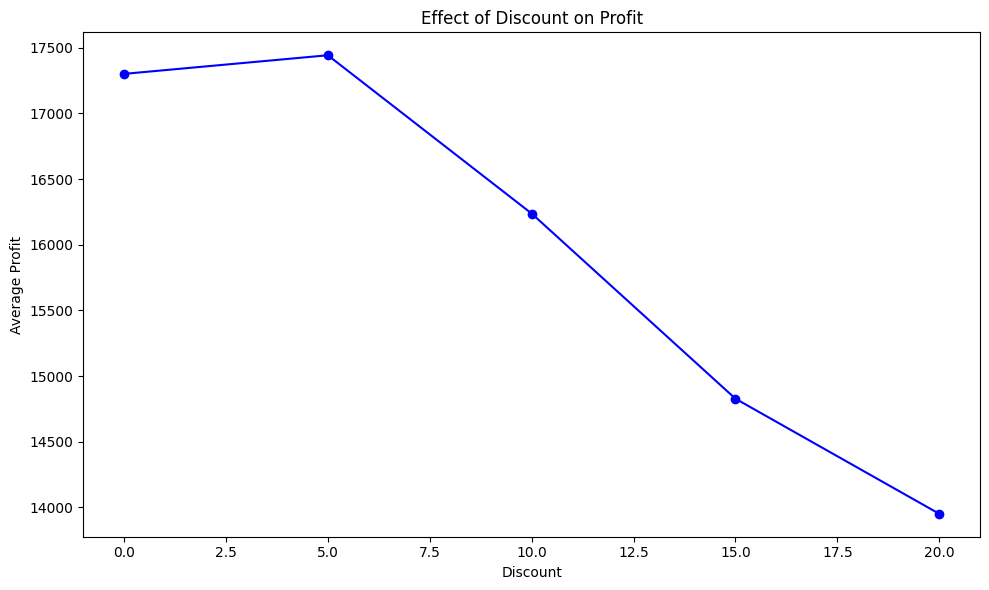

In [225]:
#Showing effect of discount on profit
plt.figure(figsize=(10, 6))
plt.plot(discount_profit["Discount"], discount_profit["Profit"],
         marker='o', linestyle='-', color='blue')

plt.title("Effect of Discount on Profit")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()

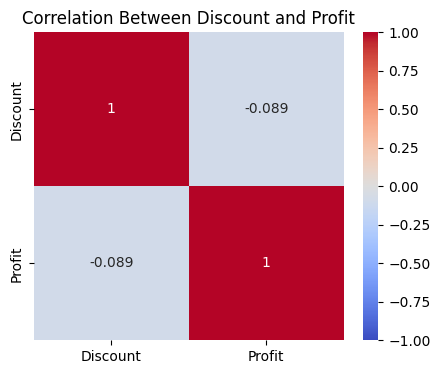

In [226]:
#Correlation between discount and profit
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Discount and Profit')
plt.show()

The correlation between Discount and Profit is –0.089, indicating a very weak negative relationship, meaning that higher discounts are associated with slightly lower profits, but the effect is minimal.

In [227]:
#Payment Mode
df['Payment Mode'].value_counts()

,count
Payment Mode,
Net Banking,1010
COD,1005
Debit Card,1003
Credit Card,994
UPI,988


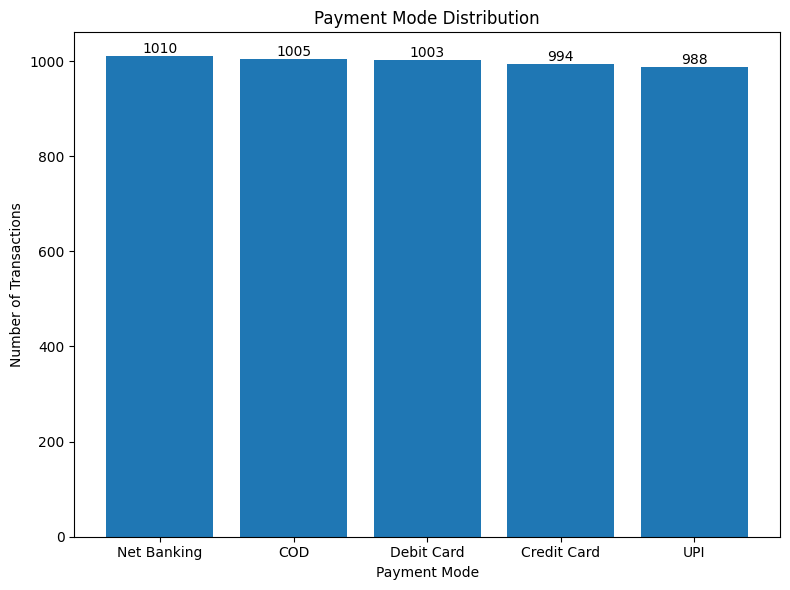

In [228]:
import matplotlib.pyplot as plt

payment_mode_counts = df['Payment Mode'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(payment_mode_counts.index, payment_mode_counts.values)
plt.title('Payment Mode Distribution')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.ylim(bottom=0)
plt.ticklabel_format(style='plain', axis='y')

for i, v in enumerate(payment_mode_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

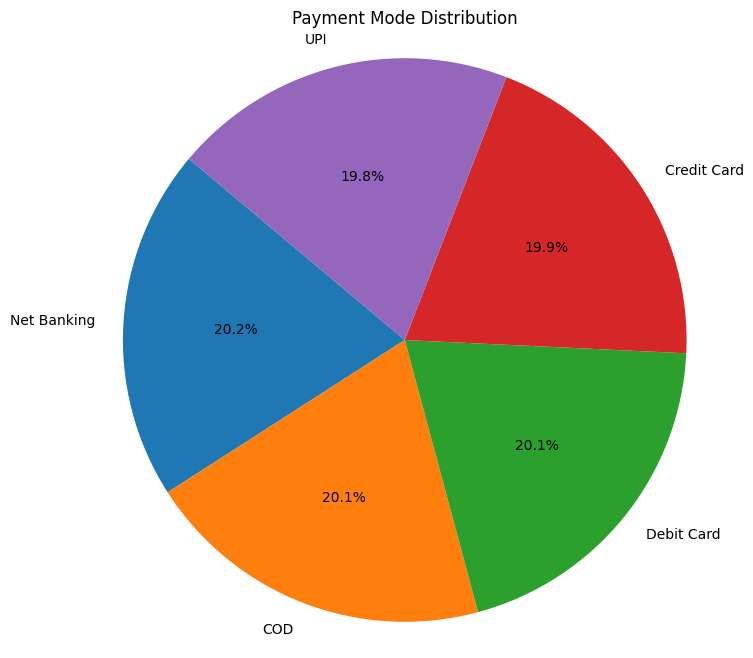

In [229]:
#Visualize Payment mode distribution
payment_mode_counts = df['Payment Mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_mode_counts, labels=payment_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Mode Distribution')
plt.axis('equal')
plt.show()

In [230]:
#Extracting Year Month
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [231]:
#Groupby Month and Sum Sales
monthly_sales = df.groupby('YearMonth')['Sales'].sum()
print(monthly_sales)

YearMonth
2023-10   21,307,522
2023-11   22,040,269
2023-12   20,624,240
2024-01   21,477,241
2024-02   19,853,396
2024-03   21,571,015
2024-04   22,214,781
2024-05   24,744,787
2024-06   21,368,962
2024-07   24,019,284
2024-08   23,299,894
2024-09   22,480,182
2024-10   23,607,627
2024-11   22,036,248
2024-12   24,806,786
2025-01   21,520,802
2025-02   19,902,446
2025-03   22,602,989
2025-04   21,653,818
2025-05   26,010,929
2025-06   21,155,496
2025-07   22,526,568
2025-08   23,317,916
2025-09   18,131,497
2025-10    1,391,328
Name: Sales, dtype: float64


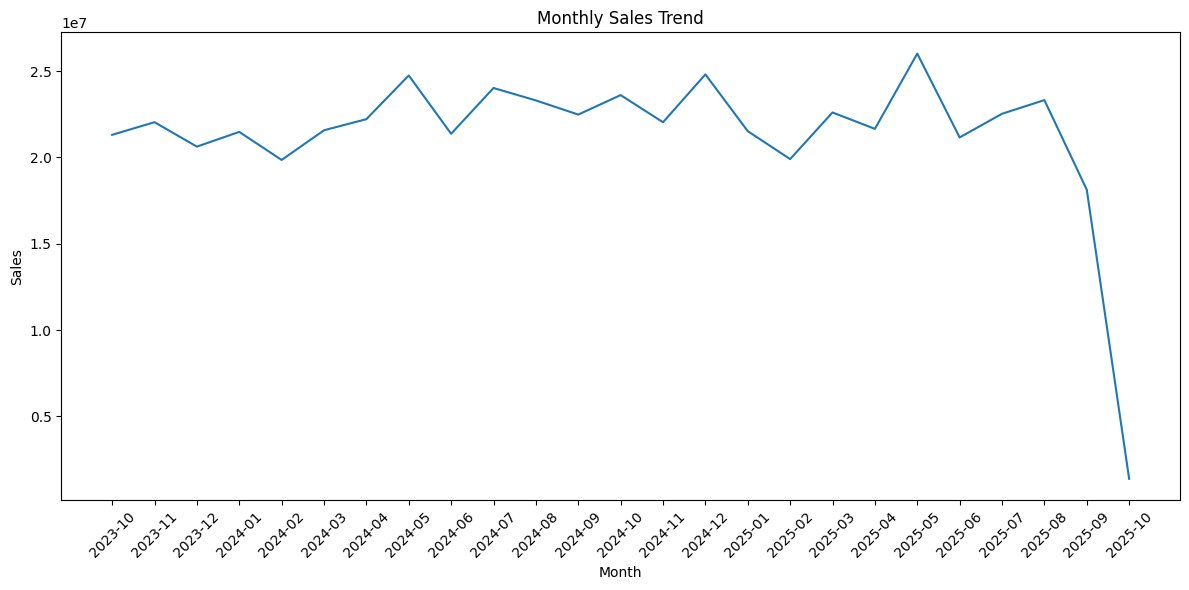

In [232]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [233]:
monthly = df.groupby('YearMonth')[['Sales', 'Profit']].sum()
print(monthly)

               Sales    Profit
YearMonth                     
2023-10   21,307,522 3,106,231
2023-11   22,040,269 3,387,740
2023-12   20,624,240 2,989,331
2024-01   21,477,241 3,104,254
2024-02   19,853,396 2,941,449
2024-03   21,571,015 3,235,675
2024-04   22,214,781 3,241,580
2024-05   24,744,787 3,692,959
2024-06   21,368,962 3,261,199
2024-07   24,019,284 3,486,946
2024-08   23,299,894 3,404,785
2024-09   22,480,182 3,292,918
2024-10   23,607,627 3,601,282
2024-11   22,036,248 3,286,992
2024-12   24,806,786 3,855,730
2025-01   21,520,802 3,255,994
2025-02   19,902,446 2,970,431
2025-03   22,602,989 3,533,884
2025-04   21,653,818 3,150,564
2025-05   26,010,929 3,979,357
2025-06   21,155,496 3,184,539
2025-07   22,526,568 3,439,384
2025-08   23,317,916 3,456,953
2025-09   18,131,497 2,677,364
2025-10    1,391,328   171,194


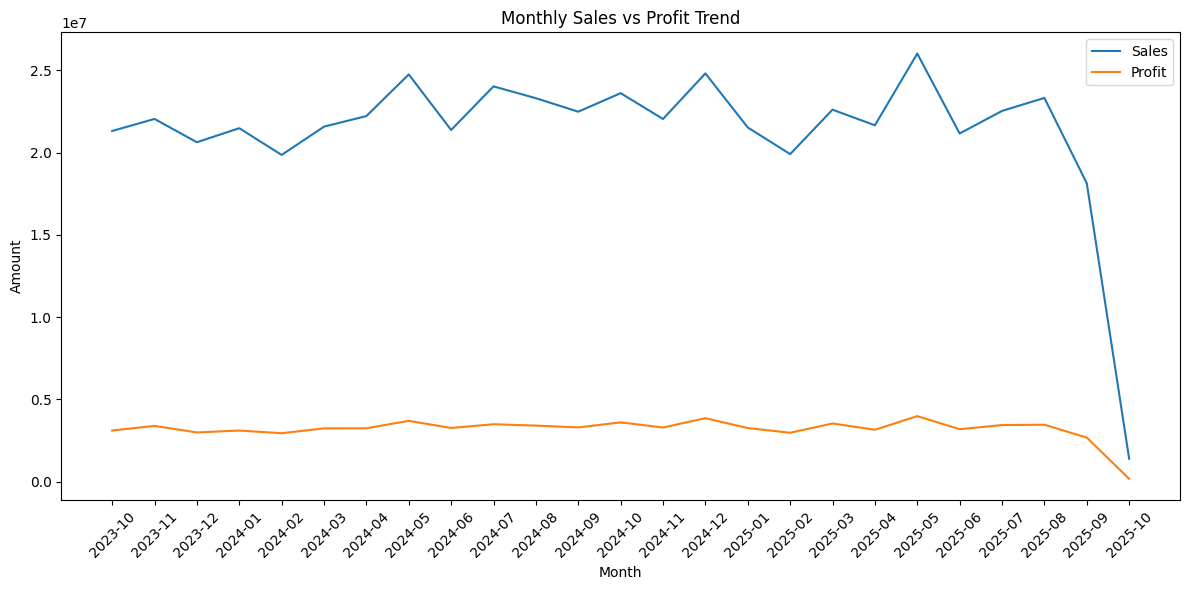

In [234]:
#Visualizing trend pf profit and sales
plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['Sales'], label='Sales')
plt.plot(monthly.index, monthly['Profit'], label='Profit')
plt.xlabel("Month")
plt.ylabel("Amount")
plt.title("Monthly Sales vs Profit Trend")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [235]:
#top 10 customers by sales
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

,Sales
Customer Name,
Aaryahi Madan,"650,152"
Kimaya Vala,"490,935"
Badal Rao,"485,698"
Adira Dhingra,"479,389"
Sumer Mann,"469,937"
Nayantara Majumdar,"459,764"
Prerak Shere,"451,862"
Bhamini Sane,"441,411"
Samarth Wagle,"427,716"


Monthly trends showing seasonality of how sales and profit fluctuate overtime. Both sales and profit follow the same seasonal pattern.

In [236]:
customer_sales = df.groupby('Customer Name')['Sales'].sum()

In [237]:
#Top 10 Customers by Sales
top_10_customers = customer_sales.sort_values(ascending=False).head(10)
print(top_10_customers)

Customer Name
Aaryahi Madan        650,152
Kimaya Vala          490,935
Badal Rao            485,698
Adira Dhingra        479,389
Sumer Mann           469,937
Nayantara Majumdar   459,764
Prerak Shere         451,862
Bhamini Sane         441,411
Samarth Wagle        427,716
Arhaan Basu          426,564
Name: Sales, dtype: float64


In [238]:
#Visaulizing Top 10 customers by Sales
plot = px.bar(top_10_customers, x=top_10_customers.index, y=top_10_customers.values,
              color=top_10_customers.index.astype(str), # Color bars by customer name (index)
              text=top_10_customers.values, # Display sales values on bars
              title='Top 10 Customers by Sales')
plot

**KEY FINDINGS**


1. Higher discount percentages significantly boosted sales volume but  reduced overall profit.
2. Some regions consistently outperformed others in both sales and profit, indicating strong market opportunities.
3. The South and West were bottom two in both sales and profit as well as discounts while North and East were top two across board.
4. Monthly sales trends revealed clear seasonality, with certain months showing peak performance.
5. Customers preferred specific payment modes often linked with higher order value.
6. Several products consistently appeared in the low-sales and low profit category.
7. Profit did not always align with sales some categories with high revenue had poor profit margins.






**RECOMMENDATIONS**
1. Refine Discount Strategy
Reduce or eliminate discounts on high-demand, high-profit categories (Furniture, Electronics).
Apply targeted discounts only to products with slow-moving inventory, seasonal demand, or naturally low margins.
Re-evaluate the discount-heavy approach in Guwahati, as it artificially inflates sales but reduces profit.

2. Strengthen Underperforming Regions
Invest in market development campaigns for South and West regions, introduce regional promotions based on customer behaviour and seasonal demand.
Improve distribution efficiency and product availability in weak regions.

3. Focus on High Value Cities
Increase inventory allocation in Lucknow, Bangalore, and Guwahati.
Introduce loyalty programs for repeat customers in these top-performing markets.

4. Product Level Optimization
Re-price or repackage products that sell well but deliver low profit (e.g., Home Decor, Lamps, Beds) and promote bundles for low selling items to increase visibility and demand.

5. Seasonal Marketing Strategy
Launch major marketing campaigns in low-performing months: January, February, March, April, June, and September.
Also, plan inventory and promotions ahead of peak months to maximize revenue.

6. Payment Method Optimization
Since Net Banking is most preferred, offer small cashback, loyalty points, or free delivery incentives to encourage its continued use.

7. Improve Profit Margins
Re-evaluate suppliers and renegotiate prices for categories with high sales but low profit.
Limit discounting in categories where discount does not drive significant profit (Kitchen).



**CONCLUSIONS**

1.   This capstone project analysed retail sales and profits using detailed transaction data across cities, regions, product categories, and time periods. The goal was to spot business patterns, identify top and low-performing areas, and see how pricing, discounts, and customer behaviour affect results.
2.   The analysis found that the North and East regions consistently led in sales and profit, while the South and West lagged behind. Some cities, like Lucknow, Guwahati, and Bangalore, performed strongly, whereas Thiruvananthapuram had the lowest results. Notably, high sales did not always mean high profits for example, Home Decor generated good revenue but had weaker profit margins.
3. Overall, the insights help the business understand its market better and provide a foundation for smarter, data-driven decisions to boost revenue, profit, and customer engagement.
